# Unsupervised Learning (K Means Clustering Algorithim)

##### Goals

Test and analyse how well this algorithim works with the specific dataset in Question.
##### Objectives

Perform Cleaning Tasks

Feature Engineering & Encoding

Splitting Data into Train & Test Partitions

Data Pre - Processing 

Model Development

Model Testing

Model Evaluation
##### Tests

Test 1 - Orginal Dataset

Test 2 - Data Pre - Processed (Standardized)

Test 3 - Data Pre - Processed (Min - Max Scaled)

Test 4 - Training the model on (Standaridized trainining data) and test on unscaled data. 

Test 5 - Training the model on (minmaxscaled trainining data) and test on unscaled data. 

Rationale for test 4 & 5 is that in the real world the trained model will be working with unseen data and therefore unscaled.


In [10]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#Supress Warnings
import warnings

In [11]:
#import CSV file as pandas dataframe
bank_data = pd.read_csv('BankChurners.csv')
#create copy(1) of dataframe
data_orginal = bank_data.copy(deep = True)

#datatype conversion
bank_data['Dependent_count'] = bank_data['Dependent_count'].astype('object')
#drop columns
bank_data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis = 1, inplace = True)
bank_data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)
bank_data.drop(['CLIENTNUM'], axis = 1, inplace = True)

#create copy(2) of updated dataframe
updated_data = bank_data.copy(deep = True)
#dataset head
bank_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Feature Engineering & Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

#Creating New Dataframe with specific Features for Clustering Analysis
new_data = bank_data[['Attrition_Flag','Customer_Age','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                      'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                     'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
#label Encoder
label_flag = LabelEncoder()
#Encode categorical variable to numeric format for machine learning model
new_data['Attrition_Flag'] = label_flag.fit_transform(new_data['Attrition_Flag'])
display(new_data.describe(),new_data.head())

<ipython-input-13-91349881a84d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Attrition_Flag'] = label_flag.fit_transform(new_data['Attrition_Flag'])


,Attrition_Flag,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


,Attrition_Flag,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Data features have high ranging variance by order of magnitude that could bias the K means model (linear distance metric Model) which assumes the data is nomrally distributed. This motivates several data pre-processing techniques to be trialed below.

### Data Pre-Processing

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Initiate standardization Scaler Function
standardscalerobject = StandardScaler() 
datascaled = standardscalerobject.fit_transform(new_data) 
# Converting the numpy array into a pandas DataFrame 
data_standardized= pd.DataFrame(datascaled) 
# Renaming the columns 
data_standardized.columns = new_data.columns 

#Initiate minxmax Scaler Function
scalermm = MinMaxScaler() 
data_mm = scalermm.fit_transform(new_data) 
# Converting the numpy array into a pandas DataFrame 
data_minmaxscaled= pd.DataFrame(data_mm) 
# Renaming the columns 
data_minmaxscaled.columns = new_data.columns 

#Summary Stats 
display(data_standardized.describe(), data_minmaxscaled.describe())

,Attrition_Flag,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,1.302510e-14,3.127744e-17,-5.687166e-16,8.453372e-15,-2.129892e-15,1.588144e-15,9.430893e-16,-1.830898e-15,-4.386159e-17,-2.522751e-16,-5.134192e-16,1.194179e-14,-1.100466e-16,-2.186132e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-2.285681e+00,-2.535541e+00,-2.871068e+00,-1.809512e+00,-2.316674e+00,-2.219655e+00,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01
25%,4.375063e-01,-6.643815e-01,-6.171294e-01,-5.227845e-01,-3.375979e-01,-4.116160e-01,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-6.619405e-01,-8.460801e-01,-5.469820e-01,-9.137243e-01
50%,4.375063e-01,-4.066159e-02,8.964513e-03,1.205790e-01,-3.375979e-01,-4.116160e-01,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293775e-02,-3.587287e-01
75%,4.375063e-01,7.078024e-01,5.098397e-01,7.639426e-01,6.519402e-01,4.924038e-01,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,9.918090e-02,6.877007e-01,4.443050e-01,8.274384e-01
max,4.375063e-01,3.327426e+00,2.513340e+00,1.407306e+00,3.620555e+00,3.204463e+00,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00


,Attrition_Flag,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.432467,0.533219,0.562516,0.390195,0.409220,0.217477,0.461984,0.216328,0.223709,0.216651,0.425261,0.191767,0.275169
std,0.367235,0.170571,0.185731,0.310882,0.168437,0.184371,0.274771,0.323793,0.263399,0.064530,0.189002,0.181958,0.064105,0.275967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.319149,0.418605,0.400000,0.333333,0.333333,0.033760,0.142630,0.038290,0.185752,0.091549,0.271318,0.156704,0.023023
50%,1.000000,0.425532,0.534884,0.600000,0.333333,0.333333,0.094042,0.506953,0.100571,0.216662,0.188550,0.441860,0.189015,0.176176
75%,1.000000,0.553191,0.627907,0.800000,0.500000,0.500000,0.291109,0.708780,0.285574,0.252870,0.235396,0.550388,0.220248,0.503504
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can clearly see the impact of the different pre-processing techniques and differentiating variations on the data.

### Splitting Data into Train and Test Partitions

We have went for a 75% Training Data & 25% Testing Data Split

In [16]:
#Train Test Splitting 
##(Oirignal Data - for compartive analysis)
train, test = train_test_split(new_data,test_size = 0.25,random_state=31)
#X Train / Y Test Split
X_train_unscaled = train
Y_test_unscaled = test 

#Train Test Splitting
##(standardized data - for comparitive analysis)
train, test = train_test_split(data_standardized,test_size = 0.25,random_state=31)
#X Train / Y Test Split
X_train_standardized = train
Y_test_standardized = test 

#Train Test Splitting
##(minmax scaled data - for comparitive analysis)
train, test = train_test_split(data_minmaxscaled,test_size = 0.25,random_state=31)
#X Train / Y Test Split
X_train_minmax = train
Y_test_minmax = test 

### Models Development & Testing

In [21]:
# Hyperparameter Tuning (Testing K-Means Clustering)
##Finding optimal value for cluster number

#Test 1 - Train model on unscaled data and test model on unscaled data
#Orginial Data (Unscaled)
#Create a list of values
list_1 = [1,3,5,7,9,12,15,20,25]
#Create an empty list
inertias_1 = []
#Initialize a for loop that loops through the list as cluster
for test_number in list_1:
    Model_1 = KMeans(
    n_clusters = test_number, n_init = 25,
        max_iter = 1000)
    Model_1.fit(X_train_unscaled)
    Predictions_1 = Model_1.predict(Y_test_unscaled)
    #Append the inertia's to empty list
    inertias_1.append(Model_1.inertia_)
    
#Test 2 - Train model on standardized data and test model on standardized data
#Standardized Data
#Create a list of values
list_2 = [1,3,5,7,9,12,15,20,25]
#Create an empty list
inertias_2 = []
#Initialize a for loop that loops through the list as cluster
for test_number in list_2:
    Model_2 = KMeans(
    n_clusters = test_number, n_init = 25,
        max_iter = 1000)
    Model_2.fit(X_train_standardized)
    Predictions_2 = Model_2.predict(Y_test_standardized)
    #Append the inertia's to empty list
    inertias_2.append(Model_2.inertia_)

#Test 3 - Train model on minmax scaled data and test model on minmaxscaled data
list_3 = [1,3,5,7,9,12,15,20,25]
#Create an empty list
inertias_3 = []
#Initialize a for loop that loops through the list as cluster
for test_number in list_3:
    Model_3 = KMeans(
    n_clusters = test_number, n_init = 25,
        max_iter = 1000)
    Model_3.fit(X_train_minmax)
    Predictions_3 = Model_3.predict(Y_test_minmax)
    #Append the inertia's to empty list
    inertias_3.append(Model_3.inertia_)
    
#Test 4 - Train model on standardized data and test model on unscaled (original) data
list_4 = [1,3,5,7,9,12,15,20,25]
#Create an empty list
inertias_4 = []
#Initialize a for loop that loops through the list as cluster
for test_number in list_4:
    Model_4 = KMeans(
    n_clusters = test_number, n_init = 25,
        max_iter = 1000)
    Model_4.fit(X_train_standardized)
    Predictions_4 = Model_4.predict(Y_test_unscaled)
    #Append the inertia's to empty list
    inertias_4.append(Model_4.inertia_)
    
#Test 5 - Train model on standardized data and test model on unscaled (original) data
list_5 = [1,3,5,7,9,12,15,20,25]
#Create an empty list
inertias_5 = []
#Initialize a for loop that loops through the list as cluster
for test_number in list_5:
    Model_5 = KMeans(
    n_clusters = test_number, n_init = 25,
        max_iter = 1000)
    Model_5.fit(X_train_minmax)
    Predictions_5 = Model_5.predict(Y_test_unscaled)
    #Append the inertia's to empty list
    inertias_5.append(Model_5.inertia_)

### Model Evaluations

###### Inertia Values

In [28]:
#Create a dataframe = dictionary holding cluster number and inertia value achieved from 5 tests above
Pre_Processing_Comparisons = pd.DataFrame({'Cluster Number':list_1,'Inertia Value Train Test Unscaled data': inertias_1,
                                          'Cluster Number':list_2,'Inertia Value Train Test Standardized Data': inertias_2,
                                          'Cluster Number':list_3,'Inertia Value Train Test MinMax Scaled Data': inertias_3,
                                          'Cluster Number':list_4,'Inertia Value Train Standaridized Data Test Unscaled Data': inertias_4,
                                           'Cluster Number':list_5,'Inertia Value Train minx Data Test Unscaled Data': inertias_5})
#Add columns to dataframe
#Show difference in inertia values between Standardized and MinMAx Scaled Data
Pre_Processing_Comparisons['Inertia Value Difference between Standardized MinMaxScaled'] = Pre_Processing_Comparisons['Inertia Value Train Test Standardized Data'] - Pre_Processing_Comparisons['Inertia Value Train Test MinMax Scaled Data']

Pre_Processing_Comparisons

,Cluster Number,Inertia Value Train Test Unscaled data,Inertia Value Train Test Standardized Data,Inertia Value Train Test MinMax Scaled Data,Inertia Value Train Standaridized Data Test Unscaled Data,Inertia Value Train minx Data Test Unscaled Data,Inertia Value Difference between Standardized MinMaxScaled
0,1,1.360453e+12,106093.713014,5788.871759,106093.713014,5788.871759,100304.841255
1,3,2.068914e+11,82804.226262,3782.260900,82804.185681,3782.255025,79021.965361
2,5,1.139341e+11,69888.979546,2943.391994,69889.018809,2943.397121,66945.587553
3,7,8.090796e+10,62649.360811,2582.658925,62647.662670,2582.662895,60066.701886
4,9,6.082073e+10,58488.077245,2341.751376,58488.360328,2341.752735,56146.325869
5,12,4.470384e+10,54100.242283,2087.751177,54057.238878,2087.857400,52012.491106
6,15,3.609327e+10,50901.578560,1941.604451,50956.343226,1939.990607,48959.974109
7,20,2.789810e+10,47139.971874,1774.715103,47110.206781,1782.660212,45365.256772
8,25,2.236285e+10,44572.117181,1667.552894,44468.776200,1665.157633,42904.564287


The minmaxscaler has worked better at reducing the inertia value in comparison to the standardized and original data.

###### Elbow Curve Plot

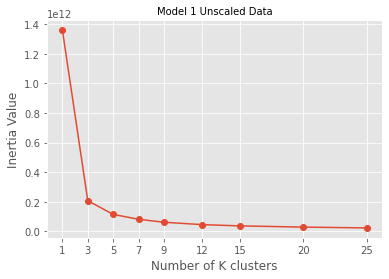

In [53]:
#Plotting Inertias (Model 1)
plt.plot(list_1,inertias_1,'-o')
plt.xlabel('Number of K clusters')
plt.ylabel('Inertia Value')
plt.xticks(list_1)
plt.title('Model 1 Unscaled Data', fontsize=10)
plt.show()

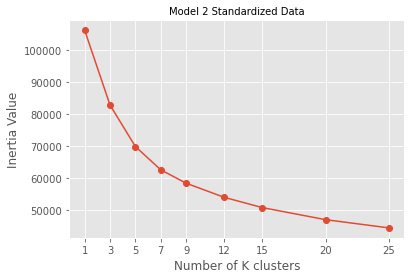

In [54]:
#Plotting Inertias (Model 2)
plt.plot(list_2,inertias_2,'-o')
plt.xlabel('Number of K clusters')
plt.ylabel('Inertia Value')
plt.xticks(list_2)
plt.title('Model 2 Standardized Data', fontsize=10)
plt.show()

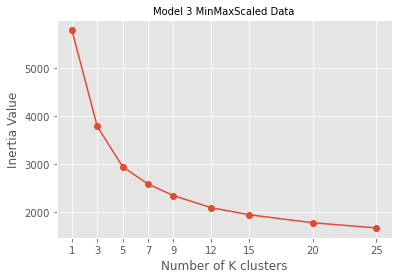

In [55]:
#Plotting Inertias (Model 3)
plt.plot(list_3,inertias_3,'-o')
plt.xlabel('Number of K clusters')
plt.ylabel('Inertia Value')
plt.xticks(list_3)
plt.title('Model 3 MinMaxScaled Data', fontsize=10)
plt.show()